In [18]:
import tarfile
import numpy as np 

In [10]:
import os

In [32]:
data_dir = 'N:/dataorg-datasets/MLsatellite/crop-type-datasets/Global/CropHarvest/'
gz_list = ['test_features.tar.gz']

In [ ]:
for gz_name in gz_list:
    print(f'Extracting {gz_name}')
    file = tarfile.open(data_dir + gz_name)
    file.extractall(data_dir)
    file.close()

Extracting test_features.tar.gz


In [29]:
students = ["Paul", "Erin", "Connie", "Moira"]

for student in range(0, len(students)):
    if student == 2:
        break
    else:
        print(students[student])

    print("Counter is " + str(student))

print("Program Complete")

Paul
Counter is 0
Erin
Counter is 1
Program Complete


In [1]:
import pandas as pd
filename = '0_canada.h5'
filepath = './Features/features/arrays/' + filename

In [3]:
file = pd.read_hdf(filepath)

ImportError: Missing optional dependency 'tables'.  Use pip or conda to install tables.

In [6]:
import h5py    
  
with h5py.File(filepath, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key]) 

Keys: <KeysViewHDF5 ['array']>


In [8]:
data[0].shape 

(18,)

In [9]:
len(data)

12

In [ ]:
import geopandas as gpd
labels = gpd.read_file(data_dir+'labels.geojson')
print(labels.head())

### CropHarvest Demo

In [1]:
from cropharvest.datasets import CropHarvest

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_KEA.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_KEA.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_KEA.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_KEA.dll
127: The specified procedure could not be found.



In [3]:
DATA_DIR = "C:/Users/lida/Downloads/nasaharvest/"
evaluation_datasets = CropHarvest.create_benchmark_datasets(DATA_DIR)
evaluation_datasets

61404160it [00:06, 9842198.37it/s]                                                                                                                                                                                                          
782628864it [01:05, 11999777.18it/s]                                                                                                                                                                                                        
51936256it [00:07, 7264797.87it/s]                                                                                                                                                                                                          


[CropHarvestEval(Kenya_1_maize, Kenya_maize),
 CropHarvestEval(Brazil_0_coffee, Brazil_coffee),
 CropHarvestEval(Togo_crop, togo-eval)]

In [4]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [5]:
togo_dataset = evaluation_datasets[-1]
X, y = togo_dataset.as_array(flatten_x=True)

In [7]:
X.shape, y.shape

((1290, 216), (1290,))

In [6]:
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

In [8]:
test_preds, test_instances = [], []
for _, test_instance in togo_dataset.test_data(flatten_x=True):
    
    test_preds.append(model.predict_proba(test_instance.x)[:, 1])
    test_instances.append(test_instance)

In [9]:
print(
    f"For the Random Forest classifier, "
    f"{test_instances[0].evaluate_predictions(test_preds[0])}, "
)

For the Random Forest classifier, {'auc_roc': 0.8853301886792453, 'f1_score': 0.7413127413127413, 'iou': 0.588957055214724, 'num_samples': 306}, 


In [10]:
X

array([[-0.74313317, -0.71180328, -0.0916625 , ..., -0.64975885,
        -0.76652236, -0.5352508 ],
       [-0.74300636, -1.1408224 , -0.08971573, ..., -0.67260454,
        -0.35473099, -0.50729199],
       [-0.20545017,  0.02700941, -0.13514046, ..., -0.66651236,
         0.14976067, -0.57664612],
       ...,
       [ 0.17066117, -0.13404664,  0.15492887, ..., -0.34210357,
        -0.57278837, -0.41214515],
       [ 0.55011753, -0.08241462, -0.38887   , ..., -0.64671276,
        -0.35832529, -0.57147326],
       [ 0.63331556,  0.90915339, -0.38432753, ..., -0.1974142 ,
         1.10034178,  0.22968129]])

In [11]:
y

array([1, 1, 1, ..., 0, 0, 0])

### Exploration

In [37]:
import geopandas as gpd

In [38]:
labels = gpd.read_file('C:/Users/lida/Downloads/nasaharvest/labels.geojson')

In [39]:
labels

,harvest_date,planting_date,label,classification_label,index,is_crop,lat,lon,dataset,collection_date,export_end_date,is_test,geometry
0,None,None,None,None,0,1,10.712596,37.083128,ethiopia,2020-10-22T00:00:00,2021-02-01T00:00:00,False,"POLYGON ((37.08252 10.71274, 37.08348 10.71291..."
1,None,None,None,None,1,1,10.724197,37.087377,ethiopia,2020-10-22T00:00:00,2021-02-01T00:00:00,False,"POLYGON ((37.08721 10.72398, 37.08714 10.72429..."
2,None,None,None,None,2,1,10.713894,37.085091,ethiopia,2020-10-22T00:00:00,2021-02-01T00:00:00,False,"POLYGON ((37.08498 10.71371, 37.08481 10.71393..."
3,None,None,None,None,3,1,10.713338,37.090290,ethiopia,2020-10-22T00:00:00,2021-02-01T00:00:00,False,"POLYGON ((37.09021 10.71320, 37.09014 10.71341..."
4,None,None,None,None,4,1,10.721858,37.083121,ethiopia,2020-10-22T00:00:00,2021-02-01T00:00:00,False,"POLYGON ((37.08307 10.72160, 37.08281 10.72197..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87865,None,None,lentils,leguminous,9083,1,53.830872,-126.228225,canada,2019-08-13T20:00:00,2020-02-01T00:00:00,False,POINT (-126.22823 53.83087)
87866,None,None,lentils,leguminous,9084,1,56.215620,-119.902831,canada,2019-08-15T20:00:00,2020-02-01T00:00:00,False,POINT (-119.90283 56.21562)
87867,None,None,lentils,leguminous,9085,1,56.213269,-119.902772,canada,2019-08-15T20:00:00,2020-02-01T00:00:00,False,POINT (-119.90277 56.21327)
87868,None,None,quinoa,other,9086,1,43.130734,-80.495014,canada,2020-07-14T20:00:00,2021-02-01T00:00:00,False,POINT (-80.49501 43.13073)


In [18]:
labels[labels['is_crop'] == 1]

,harvest_date,planting_date,label,classification_label,index,is_crop,lat,lon,dataset,collection_date,export_end_date,is_test,geometry
0,None,None,None,None,0,1,10.712596,37.083128,ethiopia,2020-10-22T00:00:00,2021-02-01T00:00:00,False,"POLYGON ((37.08252 10.71274, 37.08348 10.71291..."
1,None,None,None,None,1,1,10.724197,37.087377,ethiopia,2020-10-22T00:00:00,2021-02-01T00:00:00,False,"POLYGON ((37.08721 10.72398, 37.08714 10.72429..."
2,None,None,None,None,2,1,10.713894,37.085091,ethiopia,2020-10-22T00:00:00,2021-02-01T00:00:00,False,"POLYGON ((37.08498 10.71371, 37.08481 10.71393..."
3,None,None,None,None,3,1,10.713338,37.090290,ethiopia,2020-10-22T00:00:00,2021-02-01T00:00:00,False,"POLYGON ((37.09021 10.71320, 37.09014 10.71341..."
4,None,None,None,None,4,1,10.721858,37.083121,ethiopia,2020-10-22T00:00:00,2021-02-01T00:00:00,False,"POLYGON ((37.08307 10.72160, 37.08281 10.72197..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87865,None,None,lentils,leguminous,9083,1,53.830872,-126.228225,canada,2019-08-13T20:00:00,2020-02-01T00:00:00,False,POINT (-126.22823 53.83087)
87866,None,None,lentils,leguminous,9084,1,56.215620,-119.902831,canada,2019-08-15T20:00:00,2020-02-01T00:00:00,False,POINT (-119.90283 56.21562)
87867,None,None,lentils,leguminous,9085,1,56.213269,-119.902772,canada,2019-08-15T20:00:00,2020-02-01T00:00:00,False,POINT (-119.90277 56.21327)
87868,None,None,quinoa,other,9086,1,43.130734,-80.495014,canada,2020-07-14T20:00:00,2021-02-01T00:00:00,False,POINT (-80.49501 43.13073)


In [23]:
'apples' in labels['label'].unique()

True

In [25]:
labels[labels['label'] == 'apples']

,harvest_date,planting_date,label,classification_label,index,is_crop,lat,lon,dataset,collection_date,export_end_date,is_test,geometry
82752,None,None,apples,fruits_nuts,3970,1,43.124536,-81.364784,canada,2017-08-31T20:00:00,2018-02-01T00:00:00,False,POINT (-81.36478 43.12454)
82753,None,None,apples,fruits_nuts,3971,1,43.121944,-81.363433,canada,2017-08-31T20:00:00,2018-02-01T00:00:00,False,POINT (-81.36343 43.12194)
82754,None,None,apples,fruits_nuts,3972,1,43.120228,-81.362350,canada,2017-08-31T20:00:00,2018-02-01T00:00:00,False,POINT (-81.36235 43.12023)
82755,None,None,apples,fruits_nuts,3973,1,43.099804,-81.351081,canada,2017-08-31T20:00:00,2018-02-01T00:00:00,False,POINT (-81.35108 43.09980)
82756,None,None,apples,fruits_nuts,3974,1,43.523152,-81.695381,canada,2017-07-09T20:00:00,2018-02-01T00:00:00,False,POINT (-81.69538 43.52315)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82847,None,None,apples,fruits_nuts,4065,1,42.285583,-82.022248,canada,2017-07-12T20:00:00,2018-02-01T00:00:00,False,POINT (-82.02225 42.28558)
82848,None,None,apples,fruits_nuts,4066,1,42.284490,-82.020808,canada,2017-07-12T20:00:00,2018-02-01T00:00:00,False,POINT (-82.02081 42.28449)
82849,None,None,apples,fruits_nuts,4067,1,42.286841,-82.022450,canada,2017-07-12T20:00:00,2018-02-01T00:00:00,False,POINT (-82.02245 42.28684)
82850,None,None,apples,fruits_nuts,4068,1,42.285602,-82.021167,canada,2017-07-12T20:00:00,2018-02-01T00:00:00,False,POINT (-82.02117 42.28560)


In [26]:
labels['classification_label'].unique()

array([None, 'non_crop', 'beverage_spice', 'other', 'cereals',
       'fruits_nuts', 'leguminous', 'root_tuber', 'oilseeds',
       'vegetables_melons', 'sugar'], dtype=object)

In [27]:
labels[labels['classification_label'] == 'non_crop']

,harvest_date,planting_date,label,classification_label,index,is_crop,lat,lon,dataset,collection_date,export_end_date,is_test,geometry
2834,None,None,cerrado,non_crop,0,0,-12.141110,-45.821529,lem-brazil,2020-01-30T00:00:00,2020-02-01T00:00:00,True,"POLYGON ((-45.82294 -12.14292, -45.82280 -12.1..."
2835,None,None,cerrado,non_crop,1,0,-12.145210,-45.821058,lem-brazil,2020-01-30T00:00:00,2020-02-01T00:00:00,True,"POLYGON ((-45.82389 -12.14325, -45.81760 -12.1..."
2836,None,None,pasture,non_crop,2,0,-12.148088,-45.821423,lem-brazil,2020-01-30T00:00:00,2020-02-01T00:00:00,True,"POLYGON ((-45.82461 -12.14622, -45.81824 -12.1..."
2838,None,None,uncultivated soil,non_crop,4,0,-12.152713,-45.828907,lem-brazil,2020-01-30T00:00:00,2020-02-01T00:00:00,False,"POLYGON ((-45.83107 -12.15064, -45.83056 -12.1..."
2839,None,None,cerrado,non_crop,5,0,-12.161342,-45.803431,lem-brazil,2020-01-30T00:00:00,2020-02-01T00:00:00,True,"POLYGON ((-45.81700 -12.16195, -45.81648 -12.1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87837,None,None,peatland - harvested,non_crop,9055,0,47.761518,-64.665320,canada,2018-07-15T20:00:00,2019-02-01T00:00:00,False,POINT (-64.66532 47.76152)
87838,None,None,peatland - harvested,non_crop,9056,0,47.772996,-64.645476,canada,2018-07-15T20:00:00,2019-02-01T00:00:00,False,POINT (-64.64548 47.77300)
87839,None,None,peatland - harvested,non_crop,9057,0,47.774915,-64.640180,canada,2018-07-15T20:00:00,2019-02-01T00:00:00,False,POINT (-64.64018 47.77492)
87840,None,None,peatland - harvested,non_crop,9058,0,47.776003,-64.642244,canada,2018-07-15T20:00:00,2019-02-01T00:00:00,False,POINT (-64.64224 47.77600)


In [42]:
labels['dataset'].unique()

array(['ethiopia', 'sudan', 'togo', 'togo-eval', 'lem-brazil',
       'geowiki-landcover-2017', 'central-asia', 'kenya',
       'kenya-non-crop', 'uganda', 'tanzania', 'croplands', 'zimbabwe',
       'mali', 'mali-non-crop', 'ile-de-france', 'brazil-non-crop',
       'reunion-france', 'martinique-france', 'rwanda-ceo', 'canada'],
      dtype=object)

In [54]:
croplands_df = labels[labels['dataset'] == 'croplands']

In [67]:
geowiki_landcover_df = labels[labels['dataset'] == 'geowiki-landcover-2017']

### plot points

In [46]:
import pandas as pd
import geopandas as gpd
# import descartes 
from shapely.geometry import Point, Polygon 
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
world_map = gpd.read_file('C:/Users/lida/Anaconda3/envs/ch/Lib/site-packages/cropharvest/country_shapefile/ne_50m_admin_0_countries.shp')

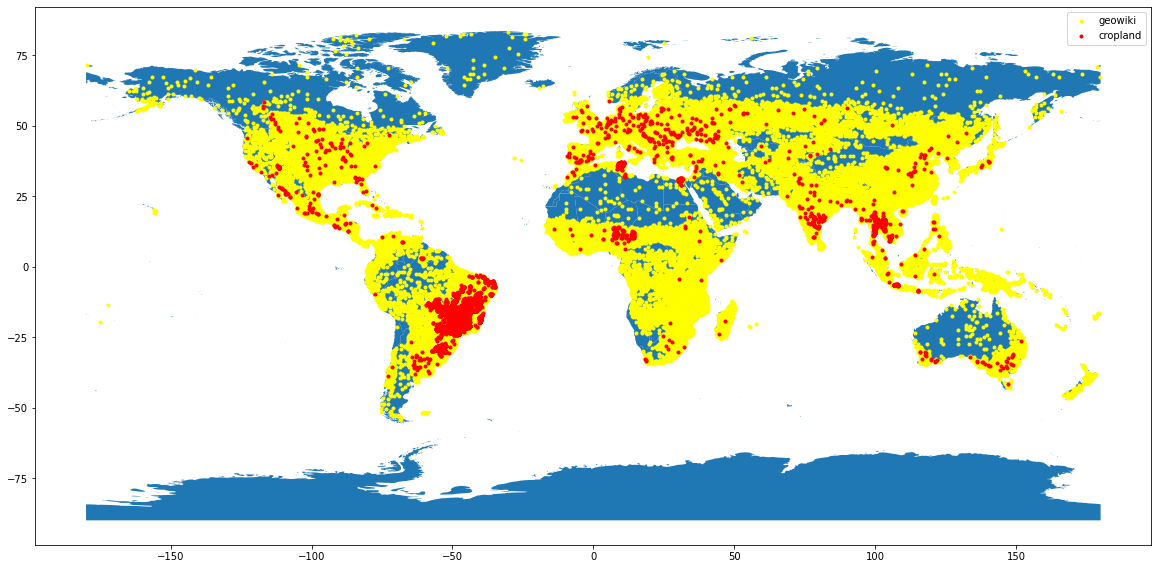

In [70]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
world_map.plot(ax=ax)
geowiki_landcover_df.plot(ax=ax, color='yellow', marker='.', label='geowiki')
croplands_df.plot(ax=ax, color='red', marker='.', label='cropland')
plt.legend(loc='best')

In [72]:
croplands_df.head()

,harvest_date,planting_date,label,classification_label,index,is_crop,lat,lon,dataset,collection_date,export_end_date,is_test,geometry
48450,None,None,None,None,0,0,35.216188,-111.631902,croplands,2021-04-29T00:00:00,2021-02-01T00:00:00,False,POINT (-111.63190 35.21619)
48451,None,None,None,None,1,0,35.215987,-111.633991,croplands,2021-04-29T00:00:00,2020-02-01T00:00:00,False,POINT (-111.63399 35.21599)
48452,None,None,None,None,2,0,35.212590,-111.636909,croplands,2021-04-29T00:00:00,2020-02-01T00:00:00,False,POINT (-111.63691 35.21259)
48453,None,None,None,None,3,0,35.215758,-111.633757,croplands,2021-04-29T00:00:00,2020-02-01T00:00:00,False,POINT (-111.63376 35.21576)
48454,None,None,None,None,4,0,35.215527,-111.633643,croplands,2021-04-29T00:00:00,2020-02-01T00:00:00,False,POINT (-111.63364 35.21553)


In [75]:
(croplands_df.is_crop == 0).sum(), (croplands_df.is_crop != 0).sum()

(120, 14856)

In [76]:
geowiki_landcover_df

,harvest_date,planting_date,label,classification_label,index,is_crop,lat,lon,dataset,collection_date,export_end_date,is_test,geometry
3634,None,None,None,None,0,0,-16.547619,46.250000,geowiki-landcover-2017,2016-09-30T00:00:00,2017-02-01T00:00:00,False,POINT (46.25000 -16.54762)
3635,None,None,None,None,1,1,-18.547619,48.250000,geowiki-landcover-2017,2016-09-30T00:00:00,2017-02-01T00:00:00,False,POINT (48.25000 -18.54762)
3636,None,None,None,None,2,0,-21.547619,44.250000,geowiki-landcover-2017,2016-09-30T00:00:00,2017-02-01T00:00:00,False,POINT (44.25000 -21.54762)
3637,None,None,None,None,3,1,-17.547619,45.250000,geowiki-landcover-2017,2016-09-30T00:00:00,2017-02-01T00:00:00,False,POINT (45.25000 -17.54762)
3638,None,None,None,None,4,0,-21.547619,46.250000,geowiki-landcover-2017,2016-09-30T00:00:00,2017-02-01T00:00:00,False,POINT (46.25000 -21.54762)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39495,None,None,None,None,35861,1,9.651786,106.550595,geowiki-landcover-2017,2016-09-30T00:00:00,2017-02-01T00:00:00,False,POINT (106.55060 9.65179)
39496,None,None,None,None,35862,0,-9.348214,39.550595,geowiki-landcover-2017,2016-09-30T00:00:00,2017-02-01T00:00:00,False,POINT (39.55060 -9.34821)
39497,None,None,None,None,35863,0,-26.348214,-57.449405,geowiki-landcover-2017,2016-09-30T00:00:00,2017-02-01T00:00:00,False,POINT (-57.44940 -26.34821)
39498,None,None,None,None,35864,1,-24.348214,26.550595,geowiki-landcover-2017,2016-09-30T00:00:00,2017-02-01T00:00:00,False,POINT (26.55060 -24.34821)


<AxesSubplot:>

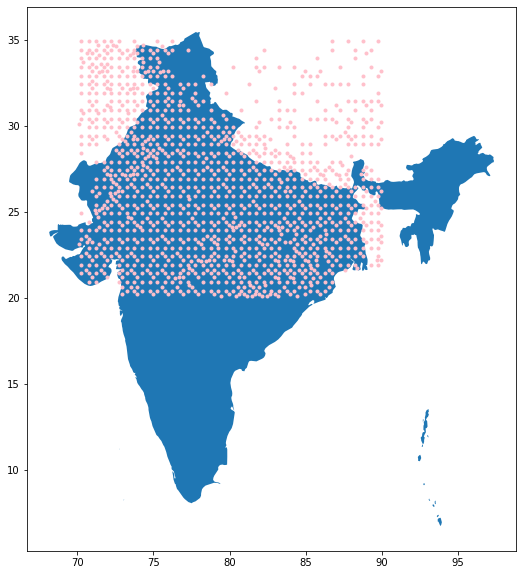

In [96]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
world_map[world_map['SOVEREIGNT'] == 'India'].plot(ax=ax)
geowiki_landcover_df[((geowiki_landcover_df['lat'] < 35) & (geowiki_landcover_df['lat'] > 20)) & ((geowiki_landcover_df['lon'] < 90) & (geowiki_landcover_df['lon'] > 70))].plot(ax=ax, color='pink', marker='.')

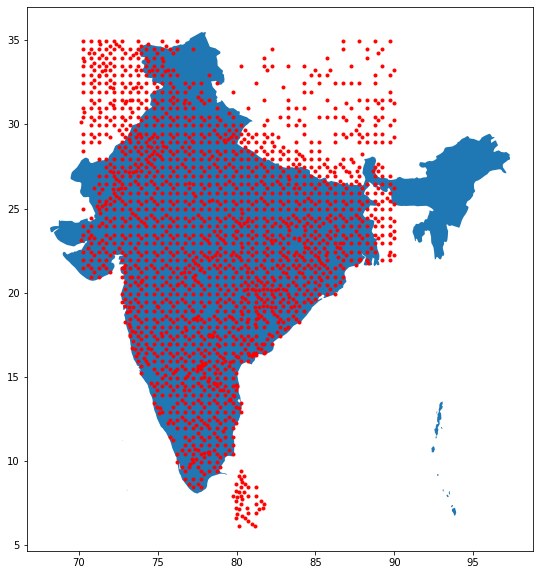

In [100]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
world_map[world_map['SOVEREIGNT'] == 'India'].plot(ax=ax)
labels[((labels['lat'] < 35) & (labels['lat'] > 5)) & ((labels['lon'] < 90) & (labels['lon'] > 70))].plot(ax=ax, color='red', marker='.')
plt.savefig('../figs/India_geowiki.png')

### Read arrays

In [29]:
import pandas as pd

In [36]:
filename = '13081_croplands.h5'
filepath = 'C:/Users/lida/Downloads/nasaharvest/features/arrays/'+filename
eg = pd.read_hdf(filepath)

ValueError: Dataset(s) incompatible with Pandas data types, not table, or no datasets found in HDF5 file.

In [33]:
import h5py    
  
with h5py.File(filepath, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key]) 

Keys: <KeysViewHDF5 ['array']>


In [34]:
data

[array([-7.35271279e+00, -1.40042735e+01,  1.04200000e+03,  1.21400000e+03,
         1.62600000e+03,  1.86400000e+03,  2.38100000e+03,  2.65600000e+03,
         2.57300000e+03,  2.90000000e+03,  7.06000000e+02,  3.19300000e+03,
         1.94500000e+03,  2.95664429e+02,  5.02525691e-03,  1.22700000e+03,
         5.00433969e+00,  3.72609819e-01]),
 array([-7.85932241e+00, -1.77230687e+01,  8.74000000e+02,  9.52000000e+02,
         1.31200000e+03,  1.31100000e+03,  1.53500000e+03,  1.70600000e+03,
         1.73000000e+03,  1.68700000e+03,  5.88000000e+02,  1.97000000e+03,
         1.05500000e+03,  2.94775085e+02,  6.83427463e-03,  1.22700000e+03,
         5.00433969e+00,  2.83671934e-01]),
 array([-7.01262046e+00, -1.53132229e+01,  9.36000000e+02,  9.59000000e+02,
         1.16700000e+03,  1.38900000e+03,  1.83800000e+03,  1.93200000e+03,
         1.73300000e+03,  2.00200000e+03,  6.29000000e+02,  2.14300000e+03,
         1.20800000e+03,  2.94854385e+02,  8.99249910e-04,  1.22700000e+03,


In [35]:
data[0].shape, len(data)

((18,), 12)